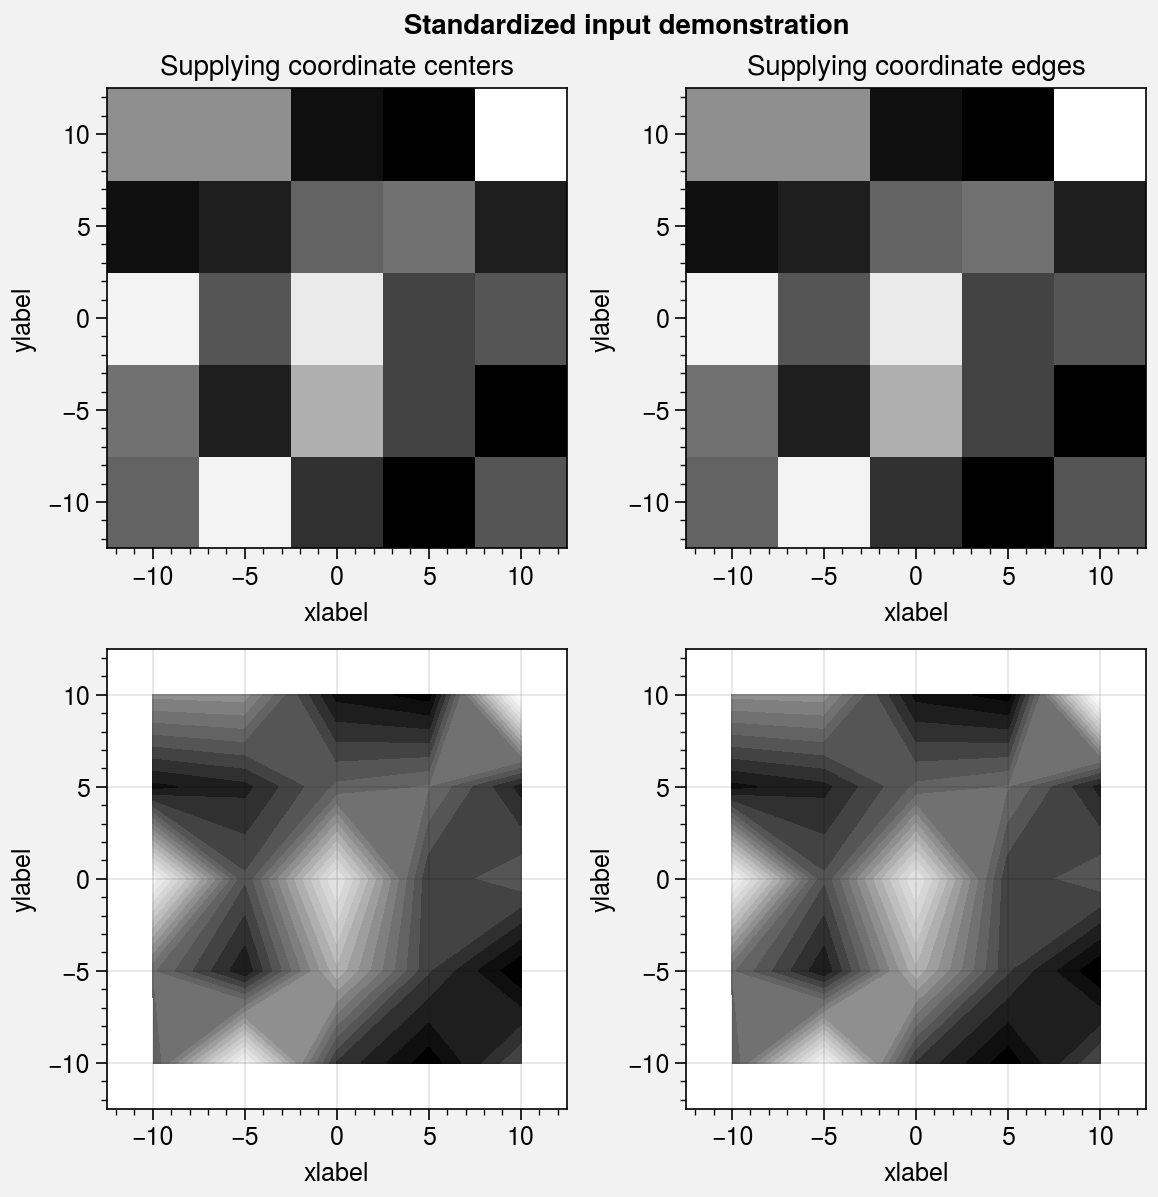

In [1]:
import proplot as pplt
import numpy as np

# Sample data
state = np.random.RandomState(51423)
x = y = np.array([-10, -5, 0, 5, 10])
xedges = pplt.edges(x)
yedges = pplt.edges(y)
data = state.rand(y.size, x.size)  # "center" coordinates
lim = (np.min(xedges), np.max(xedges))

with pplt.rc.context({'image.cmap': 'Grays', 'image.levels': 21}):
    # Figure
    fig, axs = pplt.subplots(ncols=2, nrows=2, refwidth=2.3, share=False)
    axs.format(
        xlabel='xlabel', ylabel='ylabel',
        xlim=lim, ylim=lim, xlocator=5, ylocator=5,
        suptitle='Standardized input demonstration'
    )
    axs[0].format(title='Supplying coordinate centers')
    axs[1].format(title='Supplying coordinate edges')

    # Plot using both centers and edges as coordinates
    axs[0].pcolormesh(x, y, data)
    axs[1].pcolormesh(xedges, yedges, data)
    axs[2].contourf(x, y, data)
    axs[3].contourf(xedges, yedges, data)

In [2]:
import xarray as xr
import numpy as np
import pandas as pd

# DataArray
state = np.random.RandomState(51423)
linspace = np.linspace(0, np.pi, 20)
data = 50 * state.normal(1, 0.2, size=(20, 20)) * (
    np.sin(linspace * 2) ** 2
    * np.cos(linspace + np.pi / 2)[:, None] ** 2
)
lat = xr.DataArray(
    np.linspace(-90, 90, 20),
    dims=('lat',),
    attrs={'units': '\N{DEGREE SIGN}N'}
)
plev = xr.DataArray(
    np.linspace(1000, 0, 20),
    dims=('plev',),
    attrs={'long_name': 'pressure', 'units': 'hPa'}
)
da = xr.DataArray(
    data,
    name='u',
    dims=('plev', 'lat'),
    coords={'plev': plev, 'lat': lat},
    attrs={'long_name': 'zonal wind', 'units': 'm/s'}
)

# DataFrame
data = state.rand(12, 20)
df = pd.DataFrame(
    (data - 0.4).cumsum(axis=0).cumsum(axis=1),
    index=list('JFMAMJJASOND'),
)
df.name = 'temperature (\N{DEGREE SIGN}C)'
df.index.name = 'month'
df.columns.name = 'variable (units)'

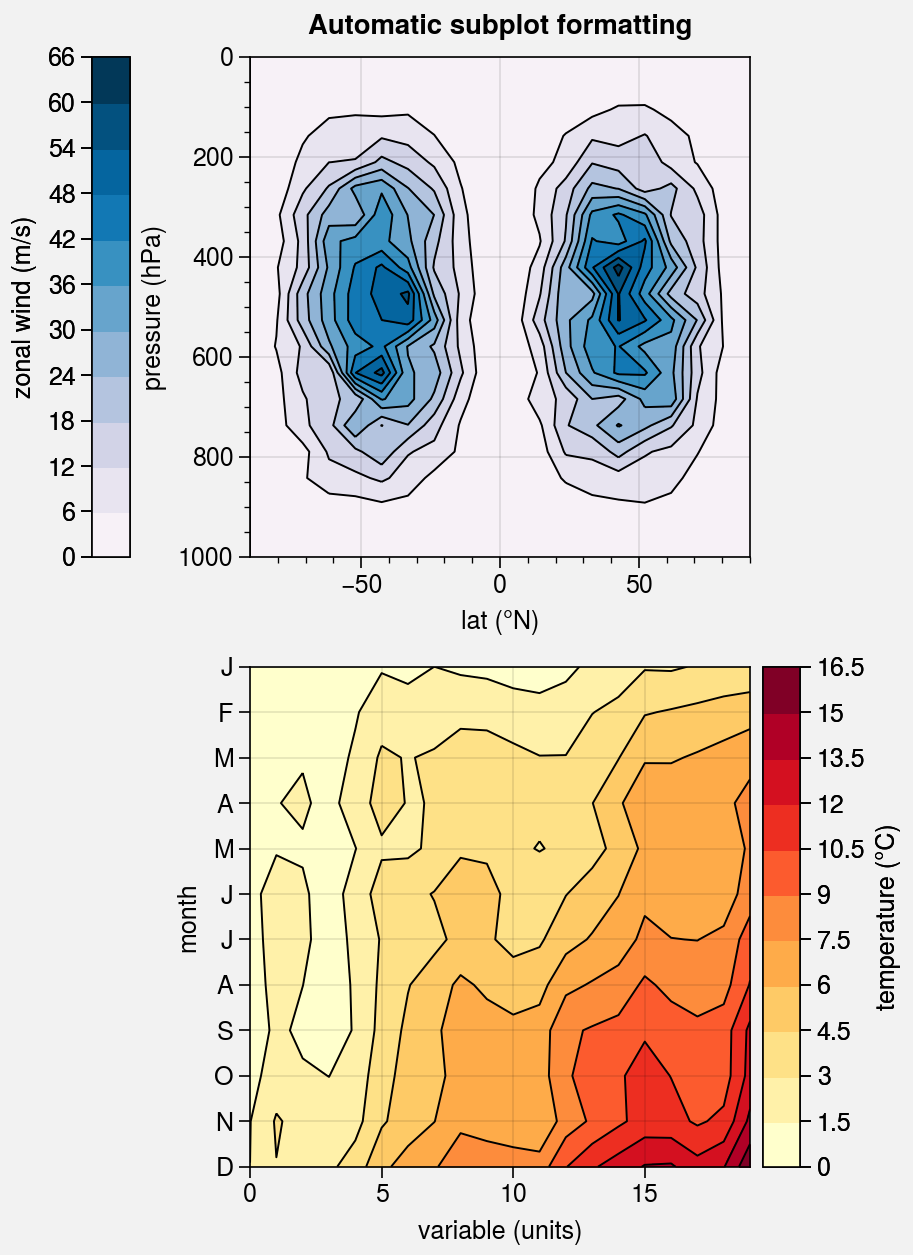

In [3]:
import proplot as pplt
fig, axs = pplt.subplots(nrows=2, refwidth=2.5, share=0)
axs.format(toplabels=('Automatic subplot formatting',))

# Plot DataArray
cmap = pplt.Colormap('PuBu', left=0.05)
axs[0].contourf(da, cmap=cmap, colorbar='l', lw=0.7, ec='k')
axs[0].format(yreverse=True)

# Plot DataFrame
axs[1].contourf(df, cmap='YlOrRd', colorbar='r', lw=0.7, ec='k')
axs[1].format(xtickminor=False, yreverse=True)

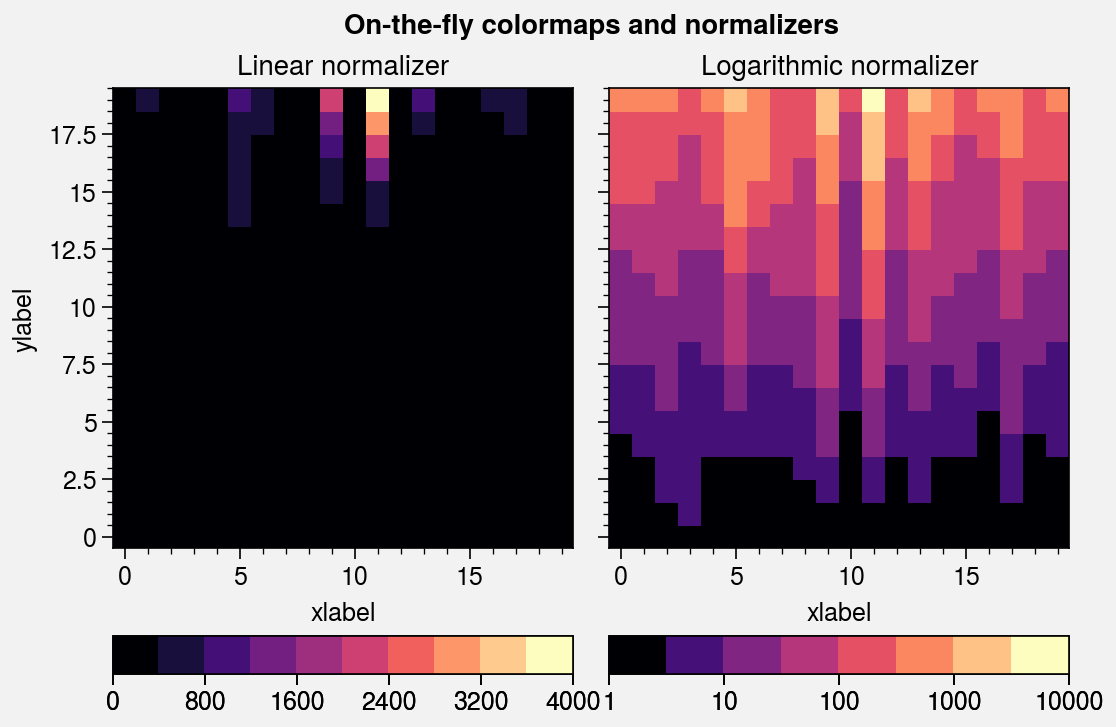

In [4]:
import proplot as pplt
import numpy as np

# Sample data
N = 20
state = np.random.RandomState(51423)
data = 11 ** (0.25 * np.cumsum(state.rand(N, N), axis=0))

# Figure
fig, axs = pplt.subplots(ncols=2, refwidth=2.3, span=False)
axs.format(
    xlabel='xlabel', ylabel='ylabel', grid=True,
    suptitle='On-the-fly colormaps and normalizers'
)

# Plot with colormaps and normalizers
cmap = 'magma'
axs[0].pcolormesh(data, cmap=cmap, colorbar='b')
axs[1].pcolormesh(data, norm='log', cmap=cmap, colorbar='b')
axs[0].format(title='Linear normalizer')
axs[1].format(title='Logarithmic normalizer')

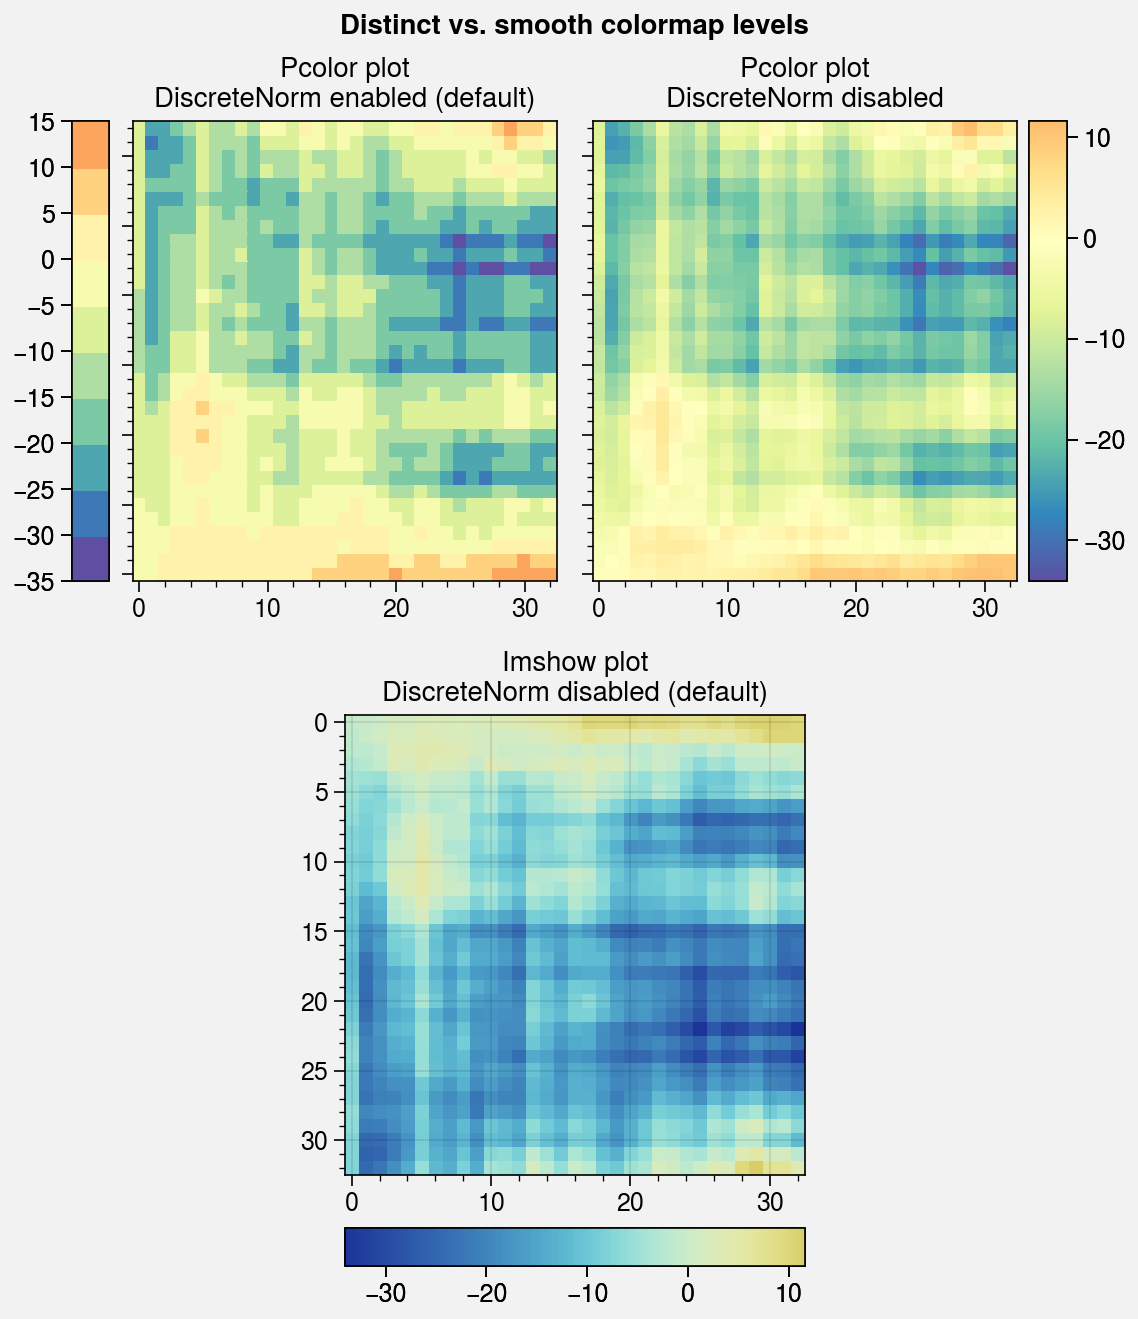

In [5]:
import proplot as pplt
import numpy as np

# Sample data
state = np.random.RandomState(51423)
data = (state.normal(0, 1, size=(33, 33))).cumsum(axis=0).cumsum(axis=1)

# Figure
fig, axs = pplt.subplots([[1, 1, 2, 2], [0, 3, 3, 0]], ref=3, refwidth=2.3)
axs.format(yformatter='none', suptitle='Distinct vs. smooth colormap levels')

# Pcolor
axs[0].pcolor(data, cmap='spectral_r', norm='div', colorbar='l')
axs[0].set_title('Pcolor plot\nDiscreteNorm enabled (default)')
axs[1].pcolor(data, discrete=False, cmap='spectral_r', norm='div', colorbar='r')
axs[1].set_title('Pcolor plot\nDiscreteNorm disabled')

# Imshow
m = axs[2].imshow(data, cmap='roma_r', norm='div', colorbar='b')
axs[2].format(title='Imshow plot\nDiscreteNorm disabled (default)', yformatter='auto')

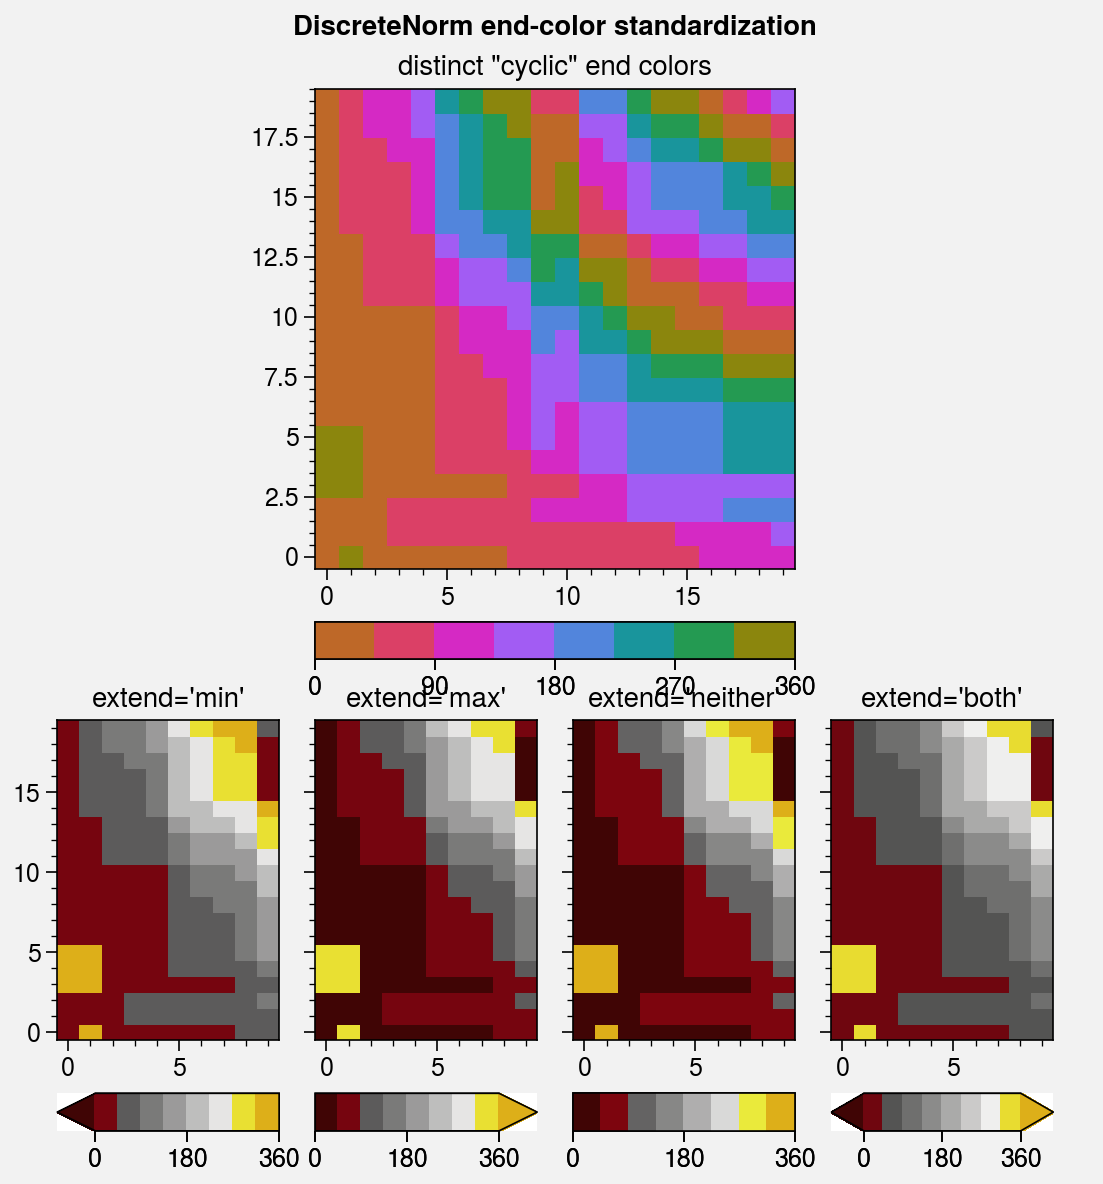

In [6]:
import proplot as pplt
import numpy as np

# Sample data
state = np.random.RandomState(51423)
data = (20 * (state.rand(20, 20) - 0.4).cumsum(axis=0).cumsum(axis=1)) % 360
levels = pplt.arange(0, 360, 45)

# Figure
fig, axs = pplt.subplots(
    [[0, 1, 1, 0], [2, 3, 4, 5]],
    wratios=(1, 1, 1, 1), hratios=(1.5, 1),
    refwidth=2.4, refaspect=1, right='2em'
)
axs.format(suptitle='DiscreteNorm end-color standardization')

# Cyclic colorbar with distinct end colors
ax = axs[0]
ax.pcolormesh(
    data, levels=levels, cmap='phase', extend='neither',
    colorbar='b', colorbar_kw={'locator': 90}
)
ax.format(title='distinct "cyclic" end colors')

# Colorbars with different extend values
for ax, extend in zip(axs[1:], ('min', 'max', 'neither', 'both')):
    ax.pcolormesh(
        data[:, :10], levels=levels, cmap='oxy',
        extend=extend, colorbar='b', colorbar_kw={'locator': 180}
    )
    ax.format(title=f'extend={extend!r}')

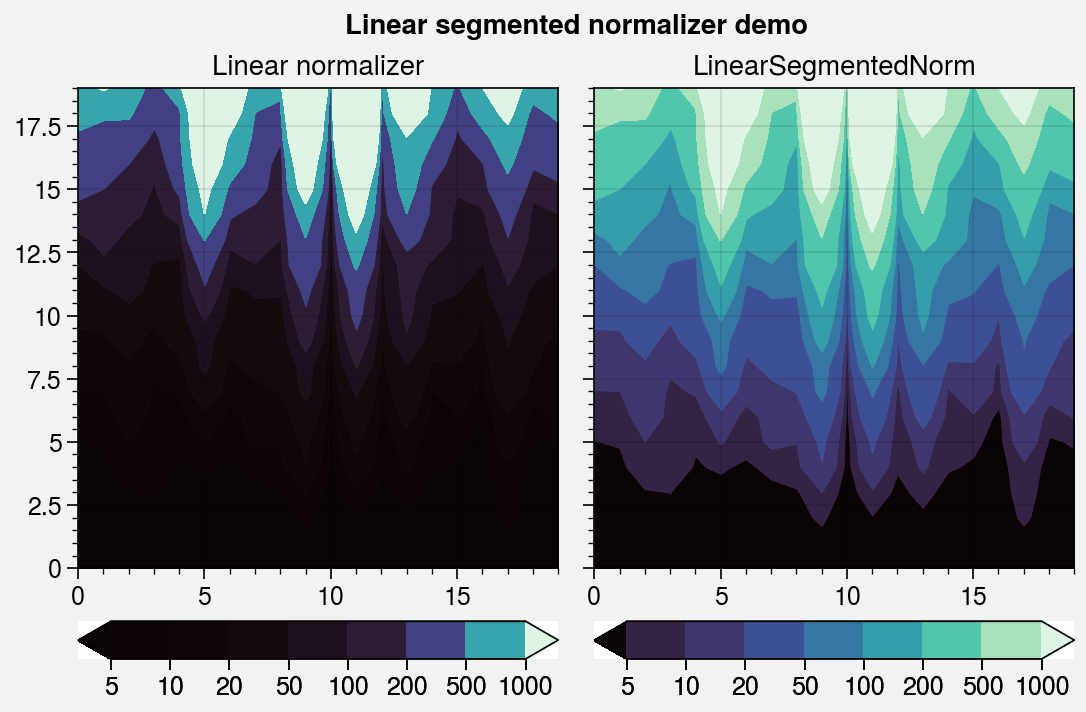

In [7]:
import proplot as pplt
import numpy as np

# Sample data
state = np.random.RandomState(51423)
data = 11 ** (2 * state.rand(20, 20).cumsum(axis=0) / 7)

# Linear segmented norm
fig, axs = pplt.subplots(ncols=2, refwidth=2.4)
ticks = [5, 10, 20, 50, 100, 200, 500, 1000]
for i, (norm, title) in enumerate(zip(
    ('linear', 'segmented'),
    ('Linear normalizer', 'LinearSegmentedNorm')
)):
    m = axs[i].contourf(
        data, levels=ticks, extend='both',
        cmap='Mako', norm=norm,
        colorbar='b', colorbar_kw={'ticks': ticks},
    )
    axs[i].format(title=title)
axs.format(suptitle='Linear segmented normalizer demo')

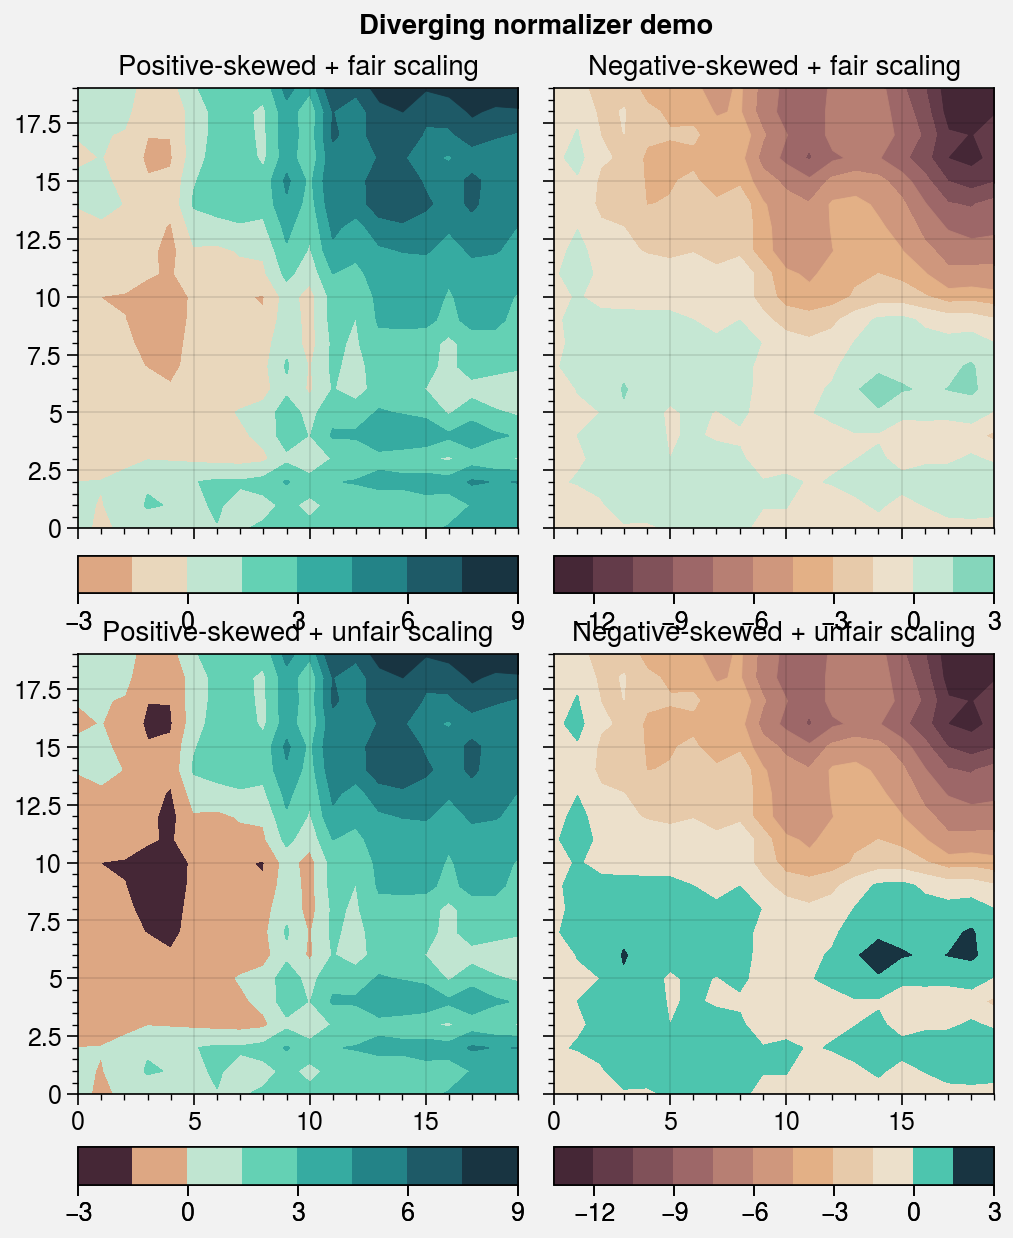

In [8]:
import proplot as pplt
import numpy as np

# Sample data
state = np.random.RandomState(51423)
data1 = (state.rand(20, 20) - 0.485).cumsum(axis=1).cumsum(axis=0)
data2 = (state.rand(20, 20) - 0.515).cumsum(axis=0).cumsum(axis=1)

# Figure
fig, axs = pplt.subplots(nrows=2, ncols=2, refwidth=2.2, order='F')
axs.format(suptitle='Diverging normalizer demo')
cmap = pplt.Colormap('DryWet', cut=0.1)

# Diverging norms
i = 0
for data, mode, fair, locator in zip(
    (data1, data2),
    ('positive', 'negative'),
    ('fair', 'unfair'),
    (3, 3),
):
    for fair in ('fair', 'unfair'):
        norm = pplt.Norm('diverging', fair=(fair == 'fair'))
        ax = axs[i]
        m = ax.contourf(data, cmap=cmap, norm=norm)
        ax.colorbar(m, loc='b', locator=locator)
        ax.format(title=f'{mode.title()}-skewed + {fair} scaling')
        i += 1

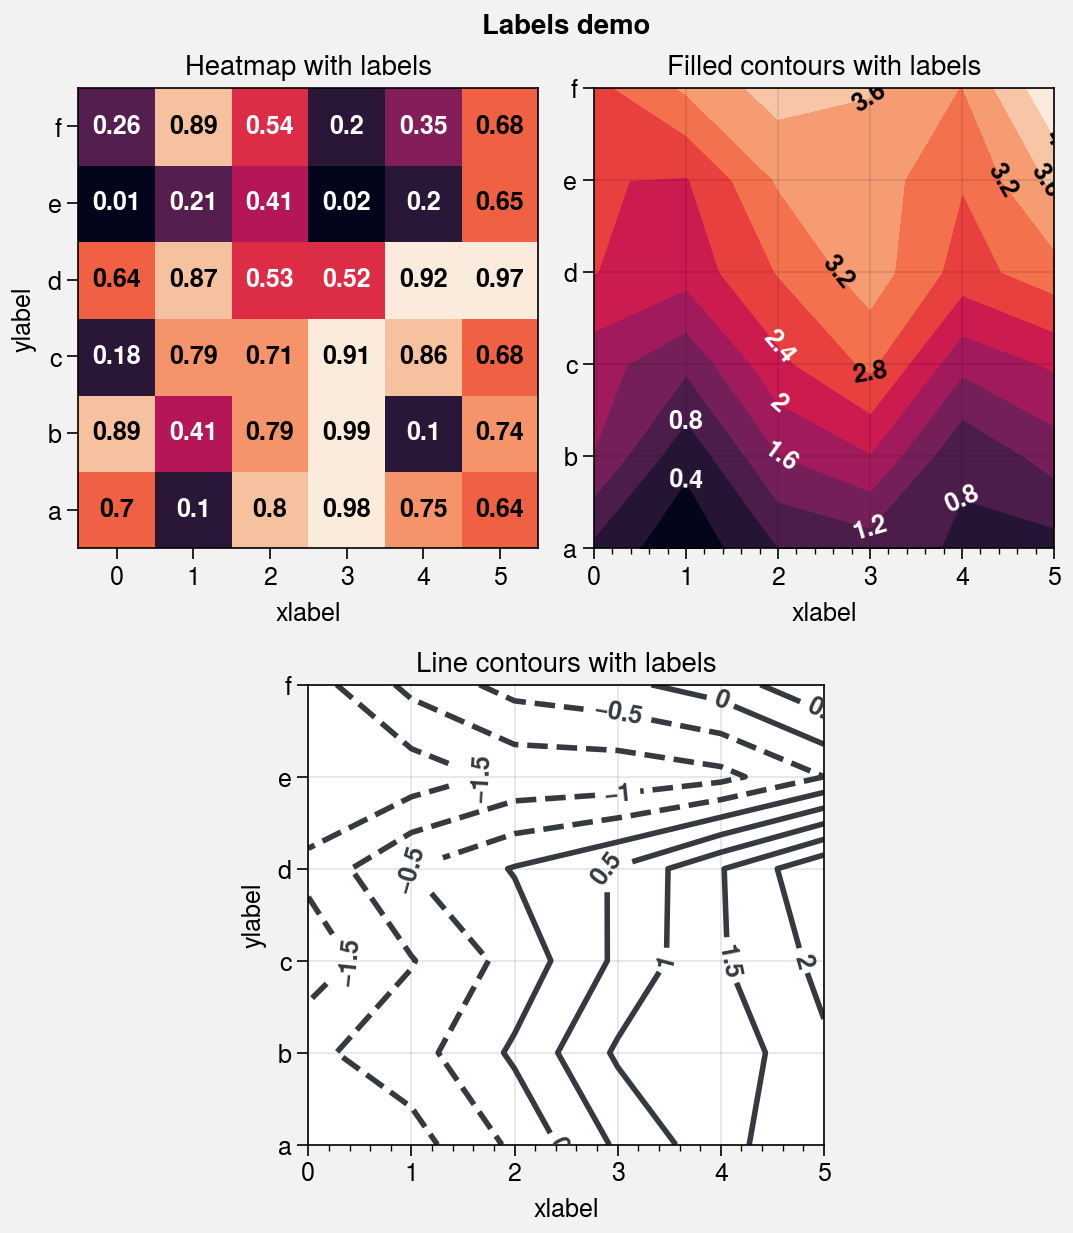

In [9]:
import proplot as pplt
import pandas as pd
import numpy as np

# Sample data
state = np.random.RandomState(51423)
data = state.rand(6, 6)
data = pd.DataFrame(data, index=pd.Index(['a', 'b', 'c', 'd', 'e', 'f']))

# Figure
fig, axs = pplt.subplots(
    [[1, 1, 2, 2], [0, 3, 3, 0]],
    refwidth=2.3, share=1, span=False,
)
axs.format(xlabel='xlabel', ylabel='ylabel', suptitle='Labels demo')

# Heatmap with labeled boxes
ax = axs[0]
m = ax.heatmap(
    data, cmap='rocket', labels=True,
    precision=2, labels_kw={'weight': 'bold'}
)
ax.format(title='Heatmap with labels')

# Filled contours with labels
ax = axs[1]
m = ax.contourf(
    data.cumsum(axis=0), labels=True,
    cmap='rocket', labels_kw={'weight': 'bold'}
)
ax.format(title='Filled contours with labels')

# Line contours with labels
ax = axs[2]
ax.contour(
    data.cumsum(axis=1) - 2, color='gray8',
    labels=True, lw=2, labels_kw={'weight': 'bold'}
)
ax.format(title='Line contours with labels')

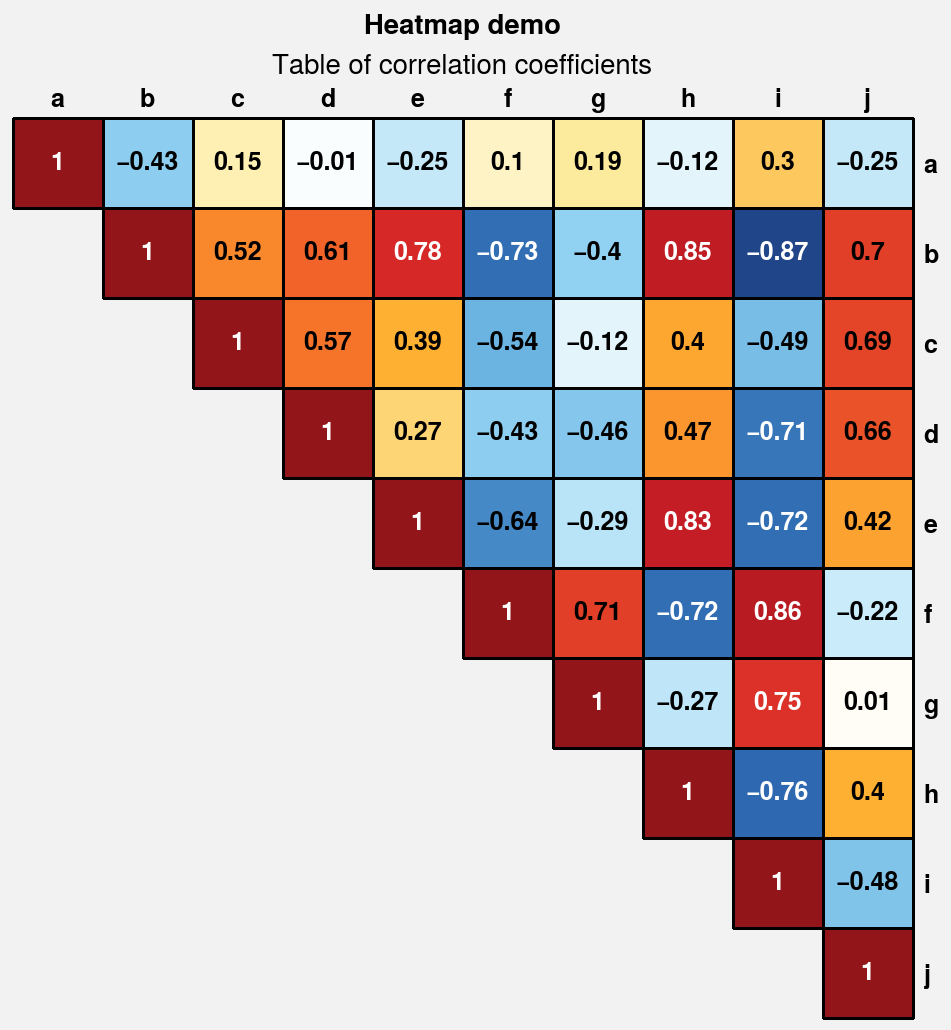

In [10]:
import proplot as pplt
import numpy as np
import pandas as pd

# Covariance data
state = np.random.RandomState(51423)
data = state.normal(size=(10, 10)).cumsum(axis=0)
data = (data - data.mean(axis=0)) / data.std(axis=0)
data = (data.T @ data) / data.shape[0]
data[np.tril_indices(data.shape[0], -1)] = np.nan  # fill half with empty boxes
data = pd.DataFrame(data, columns=list('abcdefghij'), index=list('abcdefghij'))

# Covariance matrix plot
fig, ax = pplt.subplots(refwidth=4.5)
m = ax.heatmap(
    data, cmap='ColdHot', vmin=-1, vmax=1, N=100,
    lw=0.5, edgecolor='k', labels=True, labels_kw={'weight': 'bold'},
    clip_on=False,  # turn off clipping so box edges are not cut in half
)
ax.format(
    suptitle='Heatmap demo', title='Table of correlation coefficients', alpha=0,
    xloc='top', yloc='right', yreverse=True, ticklabelweight='bold', linewidth=0,
    ytickmajorpad=4,  # the ytick.major.pad rc setting; adds extra space
)